<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Part 1 : EDA

In [67]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

color_pal = sns.color_palette('muted')
plt.style.use('tableau-colorblind10')

MAPBOX_TOKEN = 'pk.eyJ1IjoieHNpbHZlcnIiLCJhIjoiY2w3dmhybTM3MGJ3dDN2bHBxdWlub2EwZSJ9.hiSrBJzfZAvozFLyZY-0mA'
px.set_mapbox_access_token(MAPBOX_TOKEN)

# from sklearnex import patch_sklearn
# patch_sklearn()

from sklearn.neighbors import KernelDensity


%matplotlib inline

In [68]:
# read the files
dfs = [pd.read_csv(f) for f in glob("assets/input/*.csv")]
df_spray, df_test, df_train, df_weather = dfs

In [69]:
df_train.head()


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [70]:
# Preview of the data
display(df_train.head())
display(df_spray.head())
with pd.option_context("display.max_rows", 100, "display.max_columns", None):
    display(df_weather.head())
display(df_test.head())


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


# Data Visualizations


In [71]:
# Check for null values
df_train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

No null values found in df_train data.


In [72]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [73]:
# Change date column to be datetime dtype
def date_add(df):
    """
    Function created to set the index to Date, and to add in the year. months and days columns
    """
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date").sort_index()
    df["Year"] = df.index.year
    df["Month"] = df.index.month
    df["Day"] = df.index.day
    return df

In [74]:
# Implement the function to all dataframes that are to be used.
df_train = date_add(df_train)
df_spray = date_add(df_spray)
df_weather = date_add(df_weather)


In [75]:
df_train.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Day
Date,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,29
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,29
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,29


In [76]:
# Number of mosquitos with WnvPresent per year
df_train.groupby(df_train.index.year)["WnvPresent"].agg(np.sum).reset_index()


,Date,WnvPresent
0,2007,236
1,2009,19
2,2011,57
3,2013,239


In [77]:
# Create a copy of the dataframe
df1 = df_train.copy().drop(
    columns=["Block", "AddressAccuracy", "Address", "Street", "AddressNumberAndStreet"]
)
# Aggregation
df_train_year = df1.resample("M").sum().reset_index()

# Set up the plot
fig = make_subplots(
    rows=3,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=(
        "Number of Mosquitoes vs Number of Wnv Mosquitoes per year",
        "Number of Mosquitoes vs Number of Traps per year",
        "Number of Mosquitoes vs Number of Sprays per year",
    ),
    specs=[[{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}]],
)

# Plot of total mosquito vs Wnv mosquito
fig.add_trace(
    go.Bar(
        x=df_train_year["Date"],
        y=df_train_year["NumMosquitos"],
        name="NumMosquitos",
        marker_color="#636EFA",
    ),
    row=1,
    col=1,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
        x=df_train_year["Date"],
        y=df_train_year["WnvPresent"],
        name="WnvPresent",
    ),
    row=1,
    col=1,
    secondary_y=True,
)

# Aggregation of data
df_train_trap = df1.resample("M").count().reset_index()

# Plot of total mosquito vs number of traps
fig.add_trace(
    go.Bar(
        x=df_train_year["Date"],
        y=df_train_year["NumMosquitos"],
        name="NumMosquitos",
        marker_color="#636EFA",
    ),
    row=2,
    col=1,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
        x=df_train_trap["Date"],
        y=df_train_trap["Trap"],
        name="Trap",
    ),
    row=2,
    col=1,
    secondary_y=True,
)

# Aggregation of data
df_spray_year = df_spray.resample("M").count().reset_index()

# Plot of total mosquito vs number of sprays
fig.add_trace(
    go.Bar(
        x=df_train_year["Date"],
        y=df_train_year["NumMosquitos"],
        name="NumMosquitos",
        marker_color="#636EFA",
    ),
    row=3,
    col=1,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
        x=df_spray_year["Date"],
        y=df_spray_year["Latitude"],
        name="Spray",
    ),
    row=3,
    col=1,
    secondary_y=True,
)

fig.update_layout(
    hovermode="x unified",
    barmode="group",
    title_text="Number of mosquitos per year",
    height=800,
    width=1000,
    showlegend=True,
)

fig.show()

- From the above chart, we can see that 2007 has the most mosquitos, which gives the most Wnv mosquitos. This is related in the sense that when there are more mosquitoes, there are more chances of the mosquitoes having the wnv virus.
- This could is also most likely related to the number of traps, the more traps placed, the more mosquitoes would be caught.
- It also seems that there are more mosquitos in the month of July and August. Further analysis has to be done to see if this is related to the weather.
- In addition, it is observed that there are more traps placed in July, August and September. This could be due to the fact that there are more mosquitos in these months.
- Furthermore, spraying only started in August 2011, with more spraying done in July, August and September 2013.


In [78]:
# Creating the dataframe
df_train_year = (
    df_train.copy()
    .drop(
        columns=[
            "Block",
            "AddressAccuracy",
            "Address",
            "Street",
            "AddressNumberAndStreet",
        ]
    )
    .groupby(["Year", "Month"], as_index=False)
    .sum()
)

# Plot 1 - Number of mosquitos per month
mos_month = px.histogram(
    x=df_train_year["Month"],
    y=df_train_year["NumMosquitos"],
    color=df_train_year["Year"],
    barmode="group",
)


mos_month.update_layout(
    barmode="group",
    title_text="Number of mosquitos per month over the years",
    yaxis_title="Number of mosquitos",
    xaxis_title="Month",
)

mos_month.show()

# Plot 2 - Number of Wnv mosquitos per month
wnv_month = px.histogram(
    x=df_train_year["Month"],
    y=df_train_year["WnvPresent"],
    color=df_train_year["Year"],
    barmode="group",
)
wnv_month.update_layout(
    barmode="group",
    title_text="Number of mosquitos with WnvPresent per month over the years",
    yaxis_title="Number of WNV mosquitos",
    xaxis_title="Month",
)
wnv_month.show()

# Plot 3 - Number of traps per month
df_train_trap = df1.groupby(["Year", "Month"], as_index=False).count()
trap_month = px.histogram(
    x=df_train_trap["Month"],
    y=df_train_trap["Trap"],
    color=df_train_trap["Year"],
    barmode="group",
)

trap_month.update_layout(
    barmode="group",
    title_text="Number of Traps placed per month over the years",
    yaxis_title="Number of Traps",
    xaxis_title="Month",
)

trap_month.show()

# Plot 4 - Number of sprays per month
df_spray_year = df_spray.groupby(["Year", "Month"], as_index=False).count()
spray_month = px.histogram(
    x=df_spray_year["Month"],
    y=df_spray_year["Latitude"],
    color=df_spray_year["Year"],
    barmode="group",
    color_discrete_sequence=["#00CC96", "#AB63FA"],
)

spray_month.update_layout(
    barmode="group",
    title_text="Number of sprays per month over the years",
    yaxis_title="Number of sprays",
    xaxis_title="Month",
)

spray_month.show()


- With the same observations as earlier, we can see that the months of July and August are the most critical months for the wnv virues.
- Furthermore, we can see that the number of mosquitos and the number of wnv mosquitos could be related to the number of traps placed.
- Somehow for years 2009 and 2011, there seems to be lesser mosquitos and wnv mosquitos. This could be due to the fact that there are lesser traps placed in these years.


In [79]:
# Bar chart of count of different species
overall_species = px.histogram(
    df_train,
    x="Species",
    # y="NumMosquitos",
    color="WnvPresent",
    text_auto=True,
)

overall_species.update_layout(hovermode="x")

overall_species.update_layout(
    height=500,
    title_text="Number of mosquitos per species",
    yaxis_title="Number of mosquitos",
    xaxis_title="Species",
)
overall_species.show()

# overall_species.write_image("../charts/no_mosquitos_per_species.png")

- Looking at the species and the number of wnv mosquitos, we can see that even though CULEX PIPIENS/RESTUANS has the most mosquitos, it does not have the most wnv mosquitos.
- Looking at CULEX PIPIENS, it has the most wnv mosquitos, despit having a lower number of mosquitos.
- Hence, the CULEX PIPIENS/RESTUANS column could be have the highest number of mosquitos and wnv mosquitos, because of the combined count. This could be due to the fact that the CULEX PIPIENS/RESTUANS species is a combination of the CULEX PIPIENS and CULEX RESTUANS species.


In [80]:
df_train.groupby(["Year", "Month", "Species"], as_index=False)["NumMosquitos"].sum()

,Year,Month,Species,NumMosquitos
0,2007,5,CULEX PIPIENS,1
1,2007,5,CULEX PIPIENS/RESTUANS,10
2,2007,5,CULEX RESTUANS,29
3,2007,6,CULEX PIPIENS,20
4,2007,6,CULEX PIPIENS/RESTUANS,121
...,...,...,...,...
89,2013,8,CULEX TERRITANS,2
90,2013,9,CULEX ERRATICUS,7
91,2013,9,CULEX PIPIENS,3042
92,2013,9,CULEX PIPIENS/RESTUANS,3001


In [81]:
# Plot of species vs mos
# Creating the dataframe
df_train_species = df_train.groupby(["Year", "Month", "Species"], as_index=False)[
    "NumMosquitos"
].sum()
# Plot 1
species_mos = px.histogram(
    x=df_train_species["Month"],
    y=df_train_species["NumMosquitos"],
    color=df_train_species["Species"],
    barmode="group",
)


species_mos.update_layout(
    barmode="group",
    title_text="Number of mosquitos of different species per month",
    yaxis_title="Number of mosquitos",
    xaxis_title="Month",
    # hover_data=["Species"],
)

species_mos.show()

In [82]:
# Plot of species vs mos
# Creating the dataframe
df_train_species = df_train.groupby(["Year", "Month", "Species"], as_index=False)[
    "WnvPresent"
].sum()
# Plot 1
species_wnv = px.histogram(
    x=df_train_species["Month"],
    y=df_train_species["WnvPresent"],
    color=df_train_species["Species"],
    barmode="group",
)


species_wnv.update_layout(
    barmode="group",
    title_text="Number of wnv mosquitos of different species per month",
    yaxis_title="Number of mosquitos",
    xaxis_title="Month",
)

species_wnv.show()

- With comparsion to the number of mosquitos and the above chart, we can see that the number of wnv mosquitos is corelated to the number of mosquitos.


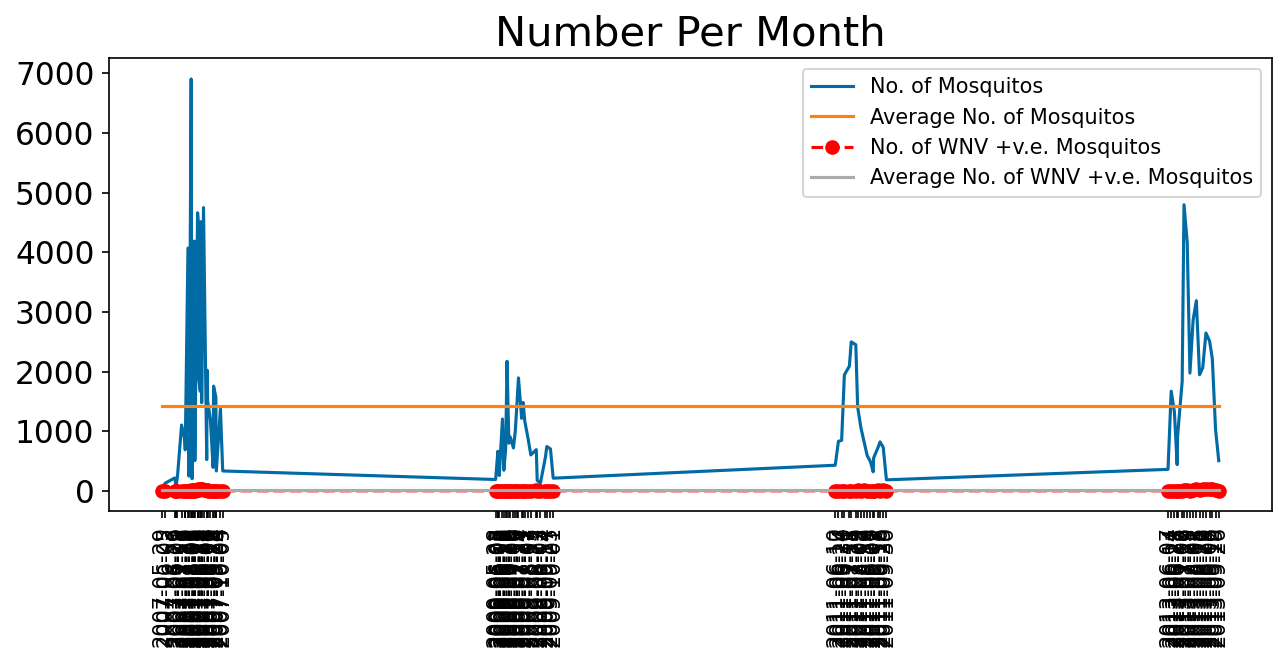

In [83]:
mos_by_month = df_train.groupby('Date').sum()
mos_by_month = mos_by_month.reset_index()
mos_by_month['Date'] = pd.to_datetime(arg=mos_by_month['Date'], format='%m/%Y')
mos_by_month = mos_by_month.sort_values(by='Date')
mos_by_month['Average'] = mos_by_month['NumMosquitos'].mean()
mos_by_month['WNV'] = mos_by_month['WnvPresent'].mean()

plt.figure(figsize=(10, 4), dpi=150)

plt.plot(mos_by_month['Date'], mos_by_month['NumMosquitos'], label='No. of Mosquitos')
plt.plot(mos_by_month['Date'], mos_by_month['Average'], label='Average No. of Mosquitos')

plt.plot(mos_by_month['Date'], mos_by_month['WnvPresent'], 'o', linestyle='--', color='red', \
         label='No. of WNV +v.e. Mosquitos')
plt.plot(mos_by_month['Date'], mos_by_month['WNV'], label='Average No. of WNV +v.e. Mosquitos')

plt.title('Number Per Month', fontsize=20)
plt.xticks(ticks=mos_by_month['Date'], rotation=90)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)
plt.show();

<br>
1) The number of mosquitos rise with a corresponding increase in temperature.
<br>
<br>
2) With a corresponding rise in mosquitos, there is a higher incidence of West Nile Virus.
<br>
<br>

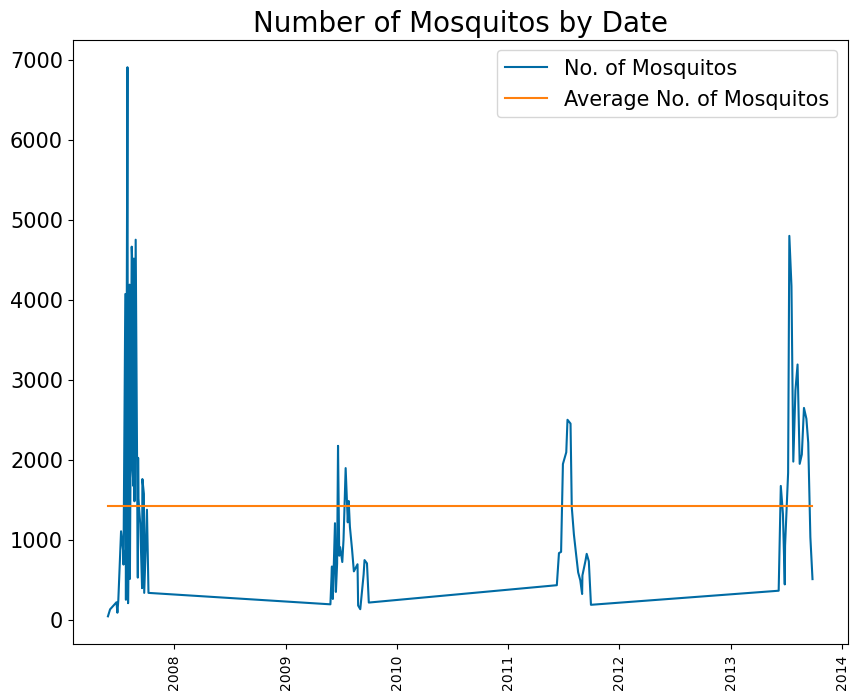

In [84]:
mos_by_date = pd.DataFrame(df_train.groupby('Date').sum()['NumMosquitos'])
mos_by_date.reset_index(inplace=True)
mos_by_date['Month'] = pd.DatetimeIndex(mos_by_date['Date']).month
mos_by_date['Average'] = mos_by_date['NumMosquitos'].mean()
mos_by_date

plt.figure(figsize=(10, 8), dpi=100)
plt.plot(mos_by_date['Date'], mos_by_date['NumMosquitos'], label='No. of Mosquitos')
plt.plot(mos_by_date['Date'], mos_by_date['Average'], label='Average No. of Mosquitos')
plt.title('Number of Mosquitos by Date', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show();

In [85]:
season_categories = {'Spring 2007':0, 'Summer 2007':1, 'Fall 2007':2, \
                    'Spring 2009':3, 'Summer 2009':4, 'Fall 2009':5, \
                                    'Summer 2011':6, 'Fall 2011':7,\
                                    'Summer 2013':8, 'Fall 2013':9}


In [86]:
mos_by_date['Month'] = mos_by_date['Month'].map({3: 'Spring', 4: 'Spring',5: 'Spring',\
                                                 6: 'Summer', 7: 'Summer',8: 'Summer',\
                                                 9: 'Fall', 10: 'Fall',11: 'Fall',\
                                                12: 'Winter', 1: 'Winter',2: 'Winter'})

mos_by_date['Month'] = mos_by_date['Month'] + ' ' + (pd.DatetimeIndex(mos_by_date['Date']).year).astype(str)
mos_by_date = mos_by_date.groupby('Month').sum().reset_index()
mos_by_date['sorting'] = mos_by_date['Month'].apply(lambda x: season_categories[x])
mos_by_date.sort_values(by='sorting', inplace=True)
mos_by_date

,Month,NumMosquitos,Average,sorting
4,Spring 2007,40,1421.463158,0
6,Summer 2007,47642,31272.189474,1
0,Fall 2007,11006,14214.631579,2
5,Spring 2009,190,1421.463158,3
7,Summer 2009,18569,28429.263158,4
1,Fall 2009,2349,7107.315789,5
8,Summer 2011,15462,17057.557895,6
2,Fall 2011,3337,8528.778947,7
9,Summer 2013,30189,19900.484211,8
3,Fall 2013,6255,5685.852632,9


In [87]:
number_of_traps = pd.DataFrame(df_train.groupby('Date').count()['Trap']).reset_index()

number_of_traps['Month'] = pd.DatetimeIndex(number_of_traps['Date']).month

number_of_traps['Month'] = number_of_traps['Month'].map({3: 'Spring', 4: 'Spring',5: 'Spring',\
                                                 6: 'Summer', 7: 'Summer',8: 'Summer',\
                                                 9: 'Fall', 10: 'Fall',11: 'Fall',\
                                                12: 'Winter', 1: 'Winter',2: 'Winter'})
number_of_traps['Month'] = number_of_traps['Month'] + ' ' + \
                           (pd.DatetimeIndex(number_of_traps['Date']).year).astype(str)

number_of_traps = number_of_traps.groupby('Month').sum().reset_index()
number_of_traps['sorting'] = number_of_traps['Month'].apply(lambda x: season_categories[x])
number_of_traps.sort_values(by='sorting', inplace=True)
number_of_traps

,Month,Trap,sorting
4,Spring 2007,25,0
6,Summer 2007,2801,1
0,Fall 2007,985,2
5,Spring 2009,59,3
7,Summer 2009,1707,4
1,Fall 2009,483,5
8,Summer 2011,1514,6
2,Fall 2011,540,7
9,Summer 2013,1906,8
3,Fall 2013,486,9


In [88]:
wnv_by_date = pd.DataFrame(df_train.groupby('Date').sum()['WnvPresent'])
wnv_by_date.reset_index(inplace=True)
wnv_by_date['Month'] = pd.DatetimeIndex(wnv_by_date['Date']).month
wnv_by_date['Month'] = wnv_by_date['Month'].map({3: 'Spring', 4: 'Spring',5: 'Spring',\
                                                 6: 'Summer', 7: 'Summer',8: 'Summer',\
                                                 9: 'Fall', 10: 'Fall',11: 'Fall',\
                                                12: 'Winter', 1: 'Winter',2: 'Winter'})
wnv_by_date['Average'] = wnv_by_date['WnvPresent'].mean()
wnv_by_date['Month'] = wnv_by_date['Month'] + ' ' + (pd.DatetimeIndex(wnv_by_date['Date']).year).astype(str)

wnv_by_date = wnv_by_date.groupby('Month').sum()
wnv_by_date = wnv_by_date.reset_index()
wnv_by_date['sorting'] = wnv_by_date['Month'].apply(lambda x: season_categories[x])
wnv_by_date = wnv_by_date.sort_values(by='sorting', ascending=True)
wnv_by_date.head(50)

,Month,WnvPresent,Average,sorting
4,Spring 2007,0,5.8,0
6,Summer 2007,206,127.6,1
0,Fall 2007,30,58.0,2
5,Spring 2009,0,5.8,3
7,Summer 2009,14,116.0,4
1,Fall 2009,5,29.0,5
8,Summer 2011,35,69.6,6
2,Fall 2011,22,34.8,7
9,Summer 2013,169,81.2,8
3,Fall 2013,70,23.2,9


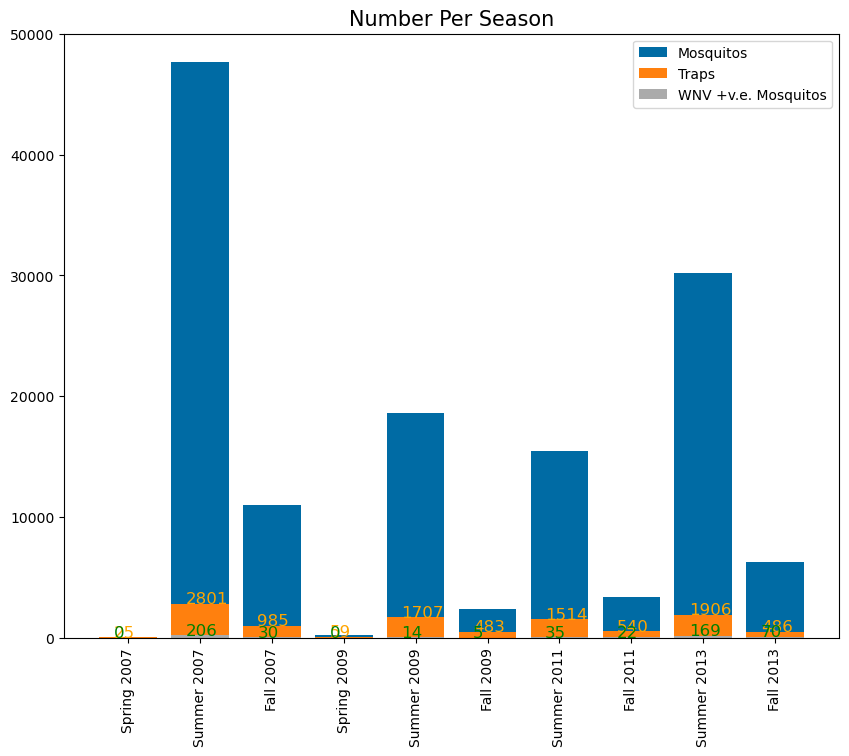

In [89]:
plt.figure(figsize=(10, 8), dpi=100)
plt.bar(mos_by_date['Month'], mos_by_date['NumMosquitos'], label='Mosquitos')
plt.bar(number_of_traps['Month'], number_of_traps['Trap'], label='Traps')
plt.xticks(rotation=90)


plt.bar(wnv_by_date['Month'], wnv_by_date['WnvPresent'], label='WNV +v.e. Mosquitos')
plt.title('Number Per Season', fontsize=15)
plt.xticks(rotation=90)

for i,v in enumerate(number_of_traps['Trap']):
    plt.text(i - 0.2, v + 15, str(v), fontsize=12, color='orange')
    
for i,v in enumerate(wnv_by_date['WnvPresent']):
    plt.text(i - 0.2, v + 5, str(v), fontsize=12, color='green')
    
plt.legend()    
plt.show();

<br>
1) The number of mosquitos rise during warm weather and decline during cold seasons.
<br>
<br>

c:\Users\pkfei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



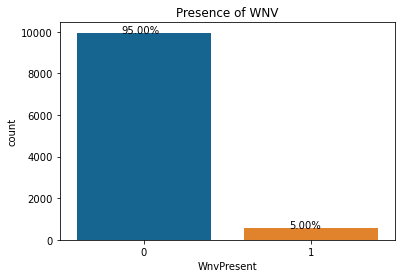

In [90]:
fig,  ax = plt.subplots(1,1)
sns.countplot(df_train['WnvPresent'], ax=ax)
plt.title('Presence of WNV')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/3,height,'{:.2f}{}'.format(round(height/len(df_train)*100,0),'%'));

<br>
1) West Nile Virus is only present in 5% of all mosquitos
<br>
<br>

## Maps - Looking at the spray locations

In [91]:
# Create a copy of the dataframe to work with
df1 = df_train.copy().reset_index()
df1 = date_add(df1)

overall_date = (
    df1.groupby([pd.Grouper(freq="Y"), "Address"])
    .agg(
        {
            "NumMosquitos": "sum",
            "WnvPresent": "sum",
            "Latitude": "median",
            "Longitude": "median",
        }
    )
    .reset_index()
)

overall_date["Date"] = overall_date["Date"].dt.date

fig = px.scatter_mapbox(
    overall_date,
    lat="Latitude",
    lon="Longitude",
    color="WnvPresent",
    size="NumMosquitos",
    # color_continuous_scale=px.colors.sequential.Bluered,
    hover_data=["NumMosquitos", "WnvPresent"],
    animation_frame="Date",
    zoom=9,
    width=600,
    height=600,
)


fig.update_layout(title="Total Mosquitoes and Wnv over the years")
fig.show()

In [92]:
# To see the effectiveness of overall spraying

# Create a copy of the dataframe to work with
df1 = df_train.copy().reset_index()
df1 = date_add(df1)

# Aggregate the data
overall_add = (
    df1.groupby(["Address"])
    .agg(
        {
            "NumMosquitos": "sum",
            "WnvPresent": "sum",
            "Latitude": "median",
            "Longitude": "median",
        }
    )
    .reset_index()
)

df_spray_copy = df_spray.reset_index().copy()
df_spray_copy["Date"] = df_spray_copy["Date"].dt.date

spray_loc = px.scatter_mapbox(
    df_spray_copy,
    lat="Latitude",
    lon="Longitude",
    size_max=15,
    zoom=9,
    color_discrete_sequence=["palegreen"],
    opacity=0.5,
    # animation_frame="Date",
    width=600,
    height=600,
)

fig2 = px.scatter_mapbox(
    overall_add,
    lat="Latitude",
    lon="Longitude",
    size="NumMosquitos",
    color="WnvPresent",
    color_continuous_scale=px.colors.sequential.Bluered,
    zoom=9,
)

spray_loc.add_trace(fig2.data[0])

spray_loc.update_layout(title="Spray Locations", mapbox_style="open-street-map")

spray_loc.show()

In [93]:
# As spraying is only done in 2013 and 2013, looking into the spraying locations for those 2 years

# Create a copy of the dataframe to work with
df1 = df_train.copy().reset_index()
df1 = date_add(df1)

# To see the effectiveness of spraying

overall_add = (
    df1.groupby(["Year", "Address"])
    .agg(
        {
            "NumMosquitos": "sum",
            "WnvPresent": "sum",
            "Latitude": "median",
            "Longitude": "median",
        }
    )
    .reset_index()
)

df_spray_copy = df_spray.reset_index().copy()
df_spray_copy = date_add(df_spray_copy)

years = [2011, 2013]

for y in years:
    fig = px.scatter_mapbox(
        df_spray_copy.query("Year == @y"),
        lat="Latitude",
        lon="Longitude",
        size_max=15,
        zoom=9,
        color_discrete_sequence=["palegreen"],
        opacity=0.5,
        # animation_frame="Date",
        width=1000,
        height=1000,
    )

    fig2 = px.scatter_mapbox(
        overall_add.query("Year == @y"),
        lat="Latitude",
        lon="Longitude",
        size="NumMosquitos",
        color="WnvPresent",
        color_continuous_scale=px.colors.sequential.Viridis,
        zoom=9,
    )

    fig.add_trace(fig2.data[0])

    fig.update_layout(title="Spray Locations", mapbox_style="open-street-map")

    fig.show()

In [94]:
df_spray.head()


,Time,Latitude,Longitude,Year,Month,Day
Date,,,,,,
2011-08-29,6:56:58 PM,42.391623,-88.089163,2011,8,29
2011-08-29,6:57:08 PM,42.391348,-88.089163,2011,8,29
2011-08-29,6:57:18 PM,42.391022,-88.089157,2011,8,29
2011-08-29,6:57:28 PM,42.390637,-88.089158,2011,8,29
2011-08-29,6:57:38 PM,42.390410,-88.088858,2011,8,29


### Weather Data


C:\Users\pkfei\AppData\Local\Temp/ipykernel_12996/3507029486.py:8: FutureWarning:

casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



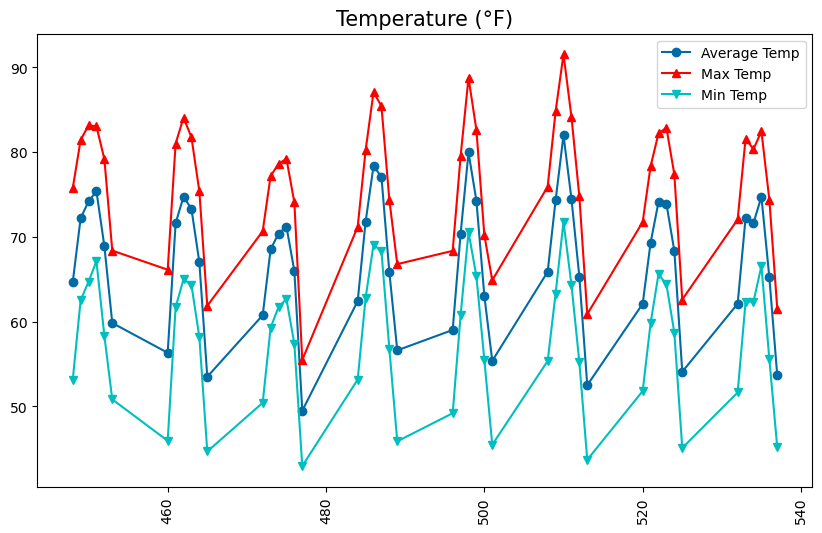

In [95]:
weather = pd.read_csv('assets/input/weather.csv')
weather['Month_Year'] = pd.to_datetime(weather['Date']).dt.to_period('M')

weather = weather[weather['Tavg'] != 'M']
weather['Tavg'] = weather['Tavg'].astype(float)

weather_avg = weather.groupby('Month_Year').mean().reset_index()
weather_avg['Month_Year'] = weather_avg['Month_Year'].astype('int')

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(weather_avg['Month_Year'],weather_avg['Tavg'], marker='o', label='Average Temp')
plt.plot(weather_avg['Month_Year'],weather_avg['Tmax'],color='r', marker='^', label='Max Temp')
plt.plot(weather_avg['Month_Year'],weather_avg['Tmin'],color='c', marker='v', label='Min Temp')

plt.title('Temperature (°F)', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('',fontsize=15)


plt.legend();


In [96]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2944 entries, 2007-05-01 to 2014-10-31
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Tmax         2944 non-null   int64  
 2   Tmin         2944 non-null   int64  
 3   Tavg         2944 non-null   object 
 4   Depart       2944 non-null   object 
 5   DewPoint     2944 non-null   int64  
 6   WetBulb      2944 non-null   object 
 7   Heat         2944 non-null   object 
 8   Cool         2944 non-null   object 
 9   Sunrise      2944 non-null   object 
 10  Sunset       2944 non-null   object 
 11  CodeSum      2944 non-null   object 
 12  Depth        2944 non-null   object 
 13  Water1       2944 non-null   object 
 14  SnowFall     2944 non-null   object 
 15  PrecipTotal  2944 non-null   object 
 16  StnPressure  2944 non-null   object 
 17  SeaLevel     2944 non-null   object 
 18  ResultSpeed  2944 non-null   f

Trace in weather = trace denotes an amount of precipitation, such as rain or snow, that is greater than zero, but is too small to be measured by standard units or methods of measurement. The designation of a trace rather than zero is used to indicate that precipitation did fall, but not enough to be measured reliably.


In [97]:
with pd.option_context("display.max_rows", 100, "display.max_columns", None):
    display(df_weather.head())


,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2,2007,5,1
2007-05-01,2,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6,2007,5,1
2007-05-02,1,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4,2007,5,2
2007-05-02,2,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4,2007,5,2
2007-05-03,1,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9,2007,5,3


In [98]:
# dropping unwanted columns = Depth, Water1 and SnowFall
df_weather_edit = df_weather.copy().drop(
    columns=["Depth", "Water1", "SnowFall", "CodeSum"]
)

df_weather_edit.head()

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67,14,51,56,0,2,0448,1849,0.00,29.10,29.82,1.7,27,9.2,2007,5,1
2007-05-01,2,84,52,68,M,51,57,0,3,-,-,0.00,29.18,29.82,2.7,25,9.6,2007,5,1
2007-05-02,1,59,42,51,-3,42,47,14,0,0447,1850,0.00,29.38,30.09,13.0,4,13.4,2007,5,2
2007-05-02,2,60,43,52,M,42,47,13,0,-,-,0.00,29.44,30.08,13.3,2,13.4,2007,5,2
2007-05-03,1,66,46,56,2,40,48,9,0,0446,1851,0.00,29.39,30.12,11.7,7,11.9,2007,5,3


In [99]:
for c in df_weather_edit.columns:

    # show columns that are not digits
    display(
        df_weather_edit.loc[~df_weather_edit[c].astype(str).str.isdigit(), c]
        .value_counts()
        .reset_index()
    )

,index,Station


,index,Tmax


,index,Tmin


,index,Tavg
0,M,11


,index,Depart
0,M,1472
1,2,93
2,-1,84
3,-2,80
4,5,77
5,7,76
6,1,76
7,3,75
8,0,74
9,-3,72


,index,DewPoint


,index,WetBulb
0,M,4


,index,Heat
0,M,11


,index,Cool
0,0,1147
1,8,138
2,5,117
3,6,109
4,9,107
5,7,104
6,4,103
7,3,99
8,1,93
9,2,89


,index,Sunrise
0,-,1472


,index,Sunset
0,-,1472


,index,PrecipTotal
0,0.00,1577
1,T,318
2,0.01,127
3,0.02,63
4,0.03,46
...,...,...
163,3.64,1
164,4.73,1
165,1.60,1
166,2.24,1


,index,StnPressure
0,29.34,128
1,29.28,124
2,29.26,123
3,29.21,107
4,29.31,106
...,...,...
99,28.88,1
100,28.59,1
101,28.67,1
102,28.75,1


,index,SeaLevel
0,30.00,96
1,29.98,85
2,29.94,85
3,29.92,83
4,29.89,82
...,...,...
97,29.25,1
98,29.23,1
99,29.46,1
100,29.43,1


,index,ResultSpeed
0,5.9,49
1,6.4,47
2,5.3,42
3,6.2,42
4,4.9,38
...,...,...
185,0.2,1
186,21.1,1
187,16.0,1
188,22.7,1


,index,ResultDir


,index,AvgSpeed
0,6.9,63
1,5.8,60
2,7.4,55
3,8.1,49
4,7.0,47
...,...,...
173,16.2,1
174,21.5,1
175,20.2,1
176,18.4,1


,index,Year


,index,Month


,index,Day


From the cell above, some values are "M", "T", "-"


In [100]:
# Removing whitespace in the values
# Replacing the values with np.nan
# Filling the nan values with forward fill
# Changing the type to float

df_weather_edit = (
    df_weather.drop(columns=["Depth", "Water1", "SnowFall", "CodeSum"])
    .apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    .replace(["M", "T", "-"], np.nan)
    .fillna(method="ffill")
    .astype(float, errors="ignore")
)

df_weather_agg = df_weather_edit.resample("M").agg(
    {
        "Tmax": "mean",
        "Tmin": "mean",
        "Tavg": "mean",
        "Depart": "mean",
        "DewPoint": "mean",
        "WetBulb": "mean",
        "Heat": "mean",
        "Cool": "mean",
        "Sunrise": "max",
        "Sunset": "max",
        "StnPressure": "mean",
        "SeaLevel": "mean",
        "ResultSpeed": "mean",
        "ResultDir": "mean",
        "AvgSpeed": "mean",
    }
)

# Merge the num of mos and the wnvpresent to the weather data to see the relationship betwewen the 2 datasets

df_train_mos_wnv_sum = df_train.resample("M")["NumMosquitos", "WnvPresent"].sum()
# df_train_mos_wnv_sum

# df_weather_agg

# new df created with the train + weather data, and merged on the dates
df_weather_agg_train = pd.merge(
    left=df_weather_agg,
    right=df_train_mos_wnv_sum,
    how="left",
    left_index=True,
    right_index=True,
)

# df_weather_agg_train

In [101]:
df_weather_agg_train.isna().sum()


Tmax            42
Tmin            42
Tavg            42
Depart          42
DewPoint        42
WetBulb         42
Heat            42
Cool            42
Sunrise         42
Sunset          42
StnPressure     42
SeaLevel        42
ResultSpeed     42
ResultDir       42
AvgSpeed        42
NumMosquitos    13
WnvPresent      13
dtype: int64

The empty cells above is most likely from an absense of weather conditions taken during that day, and NumMosquitos and WnvPresent that were not recorded during that day.


In [102]:
# Checking the coeff

df_weather_agg_train.dropna().corr()["NumMosquitos"].sort_values(ascending=False)


NumMosquitos    1.000000
WnvPresent      0.864652
DewPoint        0.381235
WetBulb         0.357603
Tmin            0.340499
Tavg            0.308560
Cool            0.290597
Tmax            0.273710
Sunset          0.167255
StnPressure     0.068458
SeaLevel        0.025917
Depart         -0.037687
Sunrise        -0.041962
ResultDir      -0.235749
Heat           -0.289378
AvgSpeed       -0.382330
ResultSpeed    -0.436921
Name: NumMosquitos, dtype: float64

In [103]:
df_weather_agg_train.dropna().corr()["NumMosquitos"].sort_values(
    ascending=False
).reset_index().query("NumMosquitos > 0")

,index,NumMosquitos
0,NumMosquitos,1.000000
1,WnvPresent,0.864652
2,DewPoint,0.381235
3,WetBulb,0.357603
4,Tmin,0.340499
5,Tavg,0.308560
6,Cool,0.290597
7,Tmax,0.273710
8,Sunset,0.167255
9,StnPressure,0.068458


- The heatmap above and the correlation table shows that Dewpoint, WetBulb, Temperature, Cool, StnPressue, SeaLevel and Sunrise/Sunset plays a part in the number of mosquitos.

Further investigation on what the features mean:

- To determine the definition


In [104]:
df_weather_agg_train.dropna().head()
df_weather_agg_train_drop = date_add(df_weather_agg_train.dropna().reset_index())


<AxesSubplot:>

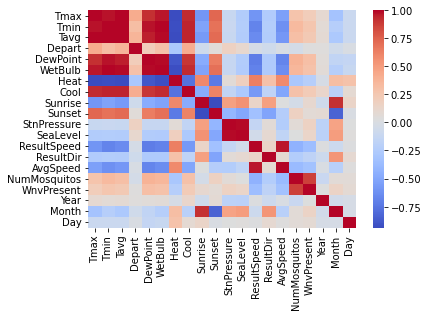

In [105]:
sns.heatmap(df_weather_agg_train_drop.corr(), cmap="coolwarm")

In [106]:
# Plot of temp vs the num of mos
temp_mos = make_subplots(specs=[[{"secondary_y": True}]])

temp_mos.add_trace(
    go.Bar(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["NumMosquitos"],
        name="NumMosquitos",
        opacity=0.5,
    ),
    secondary_y=True,
)

temp_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["Tmax"],
        name="Tmax",
    ),
    secondary_y=False,
)

# temp_mos = px.line(df_weather_agg_train, x=df_weather_agg_train.index, y="Tmax", color=df_weather_agg_train.index.year)

temp_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["Tmin"],
        name="Tmin",
    ),
    secondary_y=False,
)

temp_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["Tavg"],
        name="Tavg",
    ),
    secondary_y=False,
)


temp_mos.update_layout(
    hovermode="x unified",
    height=500,
    width=1000,
)
temp_mos.show()

- From the temperature, we can see that when the temperature starts to increase, the number of mosquito also increases. Especially during the months of July to Sep.


In [107]:
# Plot of sunrise/sunset vs the num of mos
sun_mos = make_subplots(specs=[[{"secondary_y": True}]])

sun_mos.add_trace(
    go.Bar(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["NumMosquitos"],
        name="NumMosquitos",
        opacity=0.5,
    ),
    secondary_y=True,
)

sun_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["Sunrise"],
        name="Sunrise",
    ),
    secondary_y=False,
)


sun_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["Sunset"],
        name="Sunset",
    ),
    secondary_y=False,
)


sun_mos.update_layout(
    hovermode="x unified",
    height=600,
    width=1000,
)
sun_mos.show()

- We can see that when the difference between the sunrise and sunset are the largest, meaning there is more day time, there is an increase of the number of mosquitos


In [108]:
# Plot of dewpoint and depart vs the num of mos
dew_depart_mos = make_subplots(specs=[[{"secondary_y": True}]])

dew_depart_mos.add_trace(
    go.Bar(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["NumMosquitos"],
        name="NumMosquitos",
        opacity=0.5,
    ),
    secondary_y=True,
)

dew_depart_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["Depart"],
        name="Depart",
    )
)

dew_depart_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["DewPoint"],
        name="DewPoint",
    ),
    secondary_y=False,
)

dew_depart_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index, y=df_weather_agg_train["WetBulb"], name="WetBulb"
    ),
    secondary_y=False,
)


dew_depart_mos.update_layout(
    hovermode="x unified",
    height=600,
    width=1000,
)

dew_depart_mos.show()

- The depart does not seem to affect the total number of mosquitos, as indicated by the correlation table.
- However, it does seem that with an increase of dewpoint and wetbulb, the total number of mosquitos increases.
- In addition, dewpoint and wetbulb are related to the humidity, with an increase of humdity, the temperature also increases.


In [109]:
# Plot of StnPressure and SeaLevel vs the num of mos
stnpres_sea_mos = make_subplots(specs=[[{"secondary_y": True}]])

stnpres_sea_mos.add_trace(
    go.Bar(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["NumMosquitos"],
        name="NumMosquitos",
        opacity=0.5,
    ),
    secondary_y=True,
)

stnpres_sea_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["StnPressure"],
        name="StnPressure",
    )
)

stnpres_sea_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["SeaLevel"],
        name="SeaLevel",
    ),
    secondary_y=False,
)


stnpres_sea_mos.update_layout(
    hovermode="x unified",
    height=600,
    width=1000,
)

stnpres_sea_mos.show()

* It seems like station pressure and sea level are closely related to each other, as their scatter plot are almost the same.
* However, both of these factors does not seem to affect the number of mosquitos to a very high extent.

In [110]:
# Plot of ResultSpeed, ResultDir and Avgspeed vs the num of mos
res_speed_mos = make_subplots(specs=[[{"secondary_y": True}]])

res_speed_mos.add_trace(
    go.Bar(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["NumMosquitos"],
        name="NumMosquitos",
        opacity=0.5,
    ),
    secondary_y=True,
)

res_speed_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["ResultSpeed"],
        name="ResultSpeed",
    )
)

res_speed_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["ResultDir"],
        name="ResultDir",
    ),
    secondary_y=False,
)

res_speed_mos.add_trace(
    go.Scatter(
        x=df_weather_agg_train.index,
        y=df_weather_agg_train["AvgSpeed"],
        name="AvgSpeed",
    ),
    secondary_y=False,
)


res_speed_mos.update_layout(
    hovermode="x unified",
    height=600,
    width=1000,
)

res_speed_mos.show()

* The speed of wind does not seem to affect the number of mosquitos, as indicated by the plot above and the correlation table.

# Conclusion

* The number of mosquitos per year in the dataset is not constant, as there are more traps placed in 2007 and 2013 than 2009 and 2011. This would give an impression that there are more mosqutios caught in those years.
* The spraying is also not done at the same location and time, which would not be able to give a more comparsion between the years of whether spraying is effective or not.
* Furthermore, it would be good to understand the reason to why less traps were placed in 2009 and 2011, as this would give a better understanding of the number of mosquitos in those years. As the number of mosquitos is affected by the number of traps placed.
* The weather does affect the number of mosquitos, as the number of mosquitos is mainly affected by the temperatures, humidity and the amount of day time.
* However, due to the data limitation, where we only have alternate years, we are not able to determine if spraying is effective or not. More data after 2013 should be collected to understand the effectiveness of spraying.
